## 5.1. 데이터셋 설명하기

In [1]:
from matplotlib import pyplot as plt
from collections import Counter 

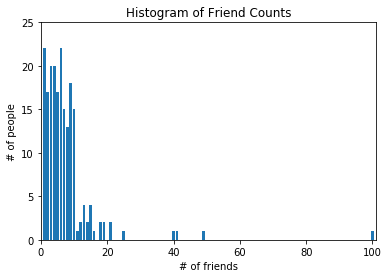

In [27]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,
               10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,
               8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,
               6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
               4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
               2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

friend_counts = Counter(num_friends)
xs = range(101)  # 최댓값이 100
ys = [friend_counts[x] for x in xs]  # 히스토그램의 높이는 해당 친구 수를 갖고 있는 사용자 수
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title('Histogram of Friend Counts')
plt.xlabel('# of friends')
plt.ylabel('# of people')
plt.show()

In [3]:
num_points = len(num_friends)  # 데이터 포인트의 개수
num_points

204

In [4]:
largest_value = max(num_friends)  # 최댓값
smallest_value = min(num_friends)  # 최솟값

print(largest_value)
print(smallest_value)

100
1


In [5]:
# 최댓값과 최솟값을 구하는 문제는 정렬된 list의 특정 위치에 있는 값을 구하는 문제로 볼 수 있다.
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

print(smallest_value)
print(second_smallest_value)
print(second_largest_value)

1
1
49


### 5.1.1. 중심 경향성
- 데이터의 중심이 어디 있는지를 나타내는 중심 경향성(central tendency) 지표는 매우 중요하다.
- 대부분의 경우, 데이터의 값을 데이터 포인트의 개수로 나눈 평균(average)을 사용하게 된다.

In [6]:
def mean(x):
    return sum(x) / len(x)

mean(num_friends)

7.333333333333333

In [12]:
def median(v):
    '''v의 중앙값을 계산'''
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        # 데이터 포인트의 개수가 홀수이면 중앙값을 반환
        return n, sorted_v[midpoint]
    else:
        # 데이터 포인트의 개수가 짝수이면 두 중앙값의 평균을 반환
        lo = midpoint - 1
        hi = midpoint 
        return n, sorted_v[lo], sorted_v[hi], ((sorted_v[lo] + sorted_v[hi]) / 2)

median(num_friends)

(204, 6, 6, 6.0)

In [15]:
def quantile(x, p):
    '''x의 p 분위에 속하는 값을 반환'''
    p_index = int(p  * len(x))
    return sorted(x)[p_index]

print(quantile(num_friends, 0.10))
print(quantile(num_friends, 0.25))
print(quantile(num_friends, 0.75))
print(quantile(num_friends, 0.90))

1
3
9
13


In [29]:
def mode(x):
    '''최빈값이 하나보다 많다면 list를 반환'''
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

mode(num_friends)

[6, 1]

### 5.1.2. 산포도
- 산포도(dispersion)는 데이터가 얼마나 퍼져 있는지를 나타낸다.
- 보통 0과 근접한 값이면 데이터가 거의 퍼져 있지 않다는 의미이고 큰 값이면 매우 퍼져있다는 것을 의미하는 통계치다.
- 분산(variance)은 산포도를 측정하는 약간 더 복잡한 개념이다.
- 분산의 단위는 기존 단위의 제곱이다. 그렇기 때문에 분산 대신 원래 단위와 같은 단위를 가지는 표준편차(standard deviation)을 이용할 때가 많다.

In [30]:

def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

99

In [35]:
##### ch04에서 사용한 dot, sum_of_squares #####
def dot(v, w):
    '''(v_1 * w_1) + ... + (v_n * w_n)'''
    return sum(v_i * w_i
              for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    '''(v_1 * v_1) + ... + (v_n * v_n)'''
    return dot(v, v)

############################################

def de_mean(x):
    '''x의 모든 데이터 포인트에서 평균을 뺌(평균을 0으로 만들기 위해)'''
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    '''x에 두 개 이상의 데이터 포인트가 존재한다고 가정'''
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1)

variance(num_friends)

# 편차의 제곱의 평균을 계산하는 데 n 대신에 n-1로 나누는 것을 확인할 수 있다.
# 이는 편차의 제곱합을 n으로 나누면 bias 때문에 모분산에 대한 추정값이 실제 모분산보다 작게 계산되는 것을 보정해주기 위함이다.

81.54351395730716

In [37]:
import math

def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.03014473623248

In [38]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

6

## 5.2. 상관관계
- 분산은 하나의 변수가 변수의 평균에서 얼마나 멀리 떨어져 있는지 계산한다면, 공분산은 두 변수가 각각의 평균에서 얼마나 멀리 떨어져 있는지 살펴본다.
- x와 y 모두 각각의 평균보다 크거나 작은 경우, 양수가 더해질 것이다. 반면, 둘 중 하나는 평균보다 크고 다른 하나는 평균보다 작을 경우, 음수가 더해질 것이다.
- 공분산이 양수이면 x의 값이 클수록 y의 값이 크고, x의 값이 작을수록 y의 값도 작다는 의미이다.
- 반대로 공분산이 음수이면 x의 값이 클수록 y의 값이 작고, x의 값이 작을수록 y의 값이 크다는 것을 의미한다.
- 공분산이 0이면 그와 같은 관계가 존재하지 않는다는 것을 의미한다.
- 상관관계는 단위가 없으며, 항상 -1(완벽한 음의 상관관계)에서 1(완벽한 양의 상관관계) 사이의 값을 갖는다.

In [39]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,
                 27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,
                 36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,
                 19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,
                 36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,
                 44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,
                 34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,
                 14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,
                 29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,
                 18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,
                 26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,
                 27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,
                 31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,
                 9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

covariance(num_friends, daily_minutes)

22.425435139573064

In [45]:
# 공분산에서 각각의 표준편차를 나눠 준 상관관계를 더 자주 살펴본다.
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0  # 편차가 존재하지 않는다면 상관관계는 0
    
correlation(num_friends, daily_minutes)

0.24736957366478218

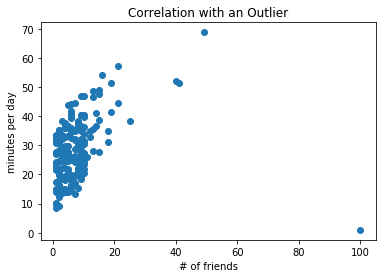

In [50]:
from matplotlib import pyplot as plt

# 이상치를 포함한 상관관계

plt.scatter(num_friends, daily_minutes)

plt.title('Correlation with an Outlier')
plt.xlabel('# of friends')
plt.ylabel('minutes per day')
plt.show()

In [47]:
outlier = num_friends.index(100)  # 이상치의 인덱스

num_friends_good = [x 
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x 
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

correlation(num_friends_good, daily_minutes_good)

0.5736792115665573

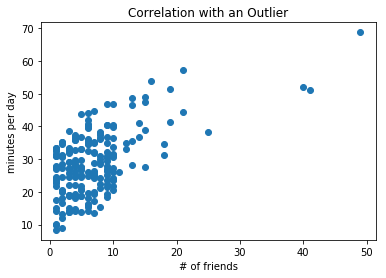

In [51]:
from matplotlib import pyplot as plt

# 이상치를 제거 후 상관관계

plt.scatter(num_friends_good, daily_minutes_good)

plt.title('Correlation with an Outlier')
plt.xlabel('# of friends')
plt.ylabel('minutes per day')
plt.show()

## 5.3. 심슨의 역설
- 데이터 분석을 하다보면 혼재변수(confounding variables)가 누락되어 상관관계가 잘못 계산되는 심슨의 역설(Simpson's paradox)을 흔히 직면하게 된다.

## 5.4. 상관관계에 대한 추가적인 경고 사항
## 5.5. 상관관계와 인과관계
## 5.6. 더 공부해 보고 싶다면
- SciPy, pandas, StatsModels 모두 다양한 통계 관련 함수를 포함하고 있다.
- 통계학은 중요하다.
> OpenIntro Statistics <br> 
> OpenStax Introductory Statistics